In [ ]:
#import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
#menampilkan data csv

data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#menagmbil 50 data dari dataset yang ada

data = data.head(50)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
#cek data kosong
data.isna().values.any()

False

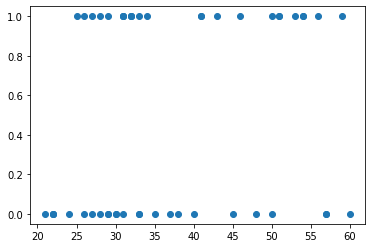

In [ ]:
#visualisasi data yang akan dipakai
plt.scatter(data['Age'], data['Outcome'])
plt.show()

In [ ]:
#split data training dan testing dengan ukuran 80:20
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Outcome'], test_size=0.20)

In [ ]:
#Membuat model logistic regression
#Fungsi pembantu untuk menormalkan data
def normalize(X):
    return X - X.mean()

#Fungsi untuk membuat prediksi
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

#Fungsi untuk melatih model
def logistic_regression(X, Y):

    X = normalize(X)

    #Inisialisasi variabel
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        #Turunan dari loss wrt b0
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  
        #Turunan dari loss wrt b1
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
    
    return b0, b1

In [ ]:
#Melatih model
b0, b1 = logistic_regression(X_train, y_train)

#Membuat prediksi
# X_test = X_test.sort_values()  
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

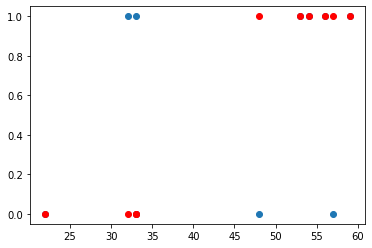

In [ ]:
#visualisasi hasil akhir
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
plt.show()

In [ ]:
#Hitung Akurasi
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")

Accuracy = 0.6
